In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 

In [11]:
Lx = 40
Ly = 50

spins = glauber.initialize_spins(Lx,Ly)
J_matrix = glauber.nn_coupling(1.,Lx,Ly)

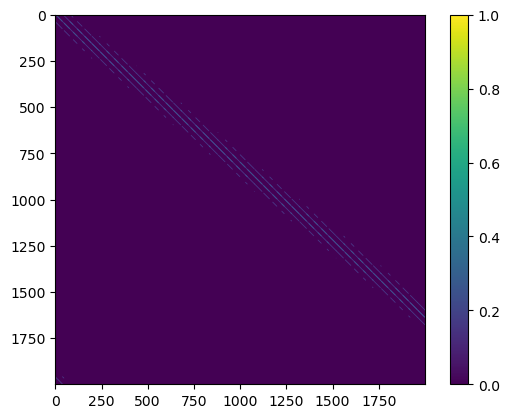

In [12]:
plt.imshow(J_matrix)
plt.colorbar()
plt.show()

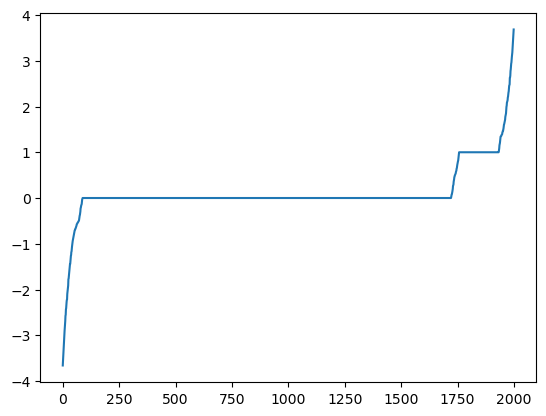

In [13]:
plt.plot(np.linalg.eigh(J_matrix)[0])
plt.show()

In [7]:
print(sites)
nn_matrix = np.zeros((Lx*Ly,Lx*Ly))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [17]:
for r in sites:
    x = r%Lx 
    y = r//(Ly-1)

    rpx = (x+1)%Lx + y*Lx
    rmx = (x-1)%Lx + y*Lx
    rpy = x%Lx + ( (y+1)%Ly )*Lx
    rmy = x%Lx + ( (y-1)%Ly )*Lx 
    
    
    print(r,rpx,rmx,rpy,rmy)

0 1 3 4 16
1 2 0 5 17
2 3 1 6 18
3 0 2 7 19
4 5 7 8 0
5 6 4 9 1
6 7 5 10 2
7 4 6 11 3
8 9 11 12 4
9 10 8 13 5
10 11 9 14 6
11 8 10 15 7
12 13 15 16 8
13 14 12 17 9
14 15 13 18 10
15 12 14 19 11
16 17 19 0 12
17 18 16 1 13
18 19 17 2 14
19 16 18 3 15
